In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

pkl_filename = 'FormattedData.pkl'
final_match_df = pd.read_pickle(pkl_filename)

In [2]:
final_match_df

,Margin,Team1_Win,"Venue_Arun Jaitley Stadium, Delhi",Venue_Barabati Stadium,Venue_Brabourne Stadium,"Venue_Brabourne Stadium, Mumbai",Venue_Buffalo Park,Venue_De Beers Diamond Oval,Venue_Dr DY Patil Sports Academy,"Venue_Dr DY Patil Sports Academy, Mumbai",...,Team2_Bowling_Consistency_Top4,Team2_Fielding_Form_Top1,Team2_Fielding_Form_Top2,Team2_Fielding_Form_Top3,Team2_Fielding_Form_Top4,Team2_Fielding_Consistency_Top1,Team2_Fielding_Consistency_Top2,Team2_Fielding_Consistency_Top3,Team2_Fielding_Consistency_Top4,POM_Frequency
0,7.0,0,False,False,False,False,False,False,False,False,...,60.222355,4.33290,2.888600,2.777500,2.583075,28.747125,23.608750,17.164950,8.832450,8.0
1,7.0,0,False,False,False,False,False,False,False,False,...,79.259101,6.49935,3.999600,2.777500,2.666400,26.247375,15.442900,10.748925,8.332500,10.0
2,14.0,1,False,False,False,False,False,False,False,False,...,49.491711,5.44390,5.221700,3.221900,2.333100,27.663900,19.525825,11.498850,8.499150,1.0
3,7.0,0,False,False,False,False,False,False,False,False,...,59.355712,4.33290,2.888600,2.777500,2.583075,28.747125,23.608750,17.164950,8.832450,5.0
4,5.0,0,False,False,False,False,False,False,False,False,...,21.317256,3.44410,3.249675,3.083025,2.666400,25.497450,13.415325,10.776700,6.915975,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,5.0,1,False,False,False,False,False,False,False,False,...,29.132374,2.66640,0.000000,0.000000,0.000000,31.163550,22.164450,9.082425,5.332800,2.0
946,5.0,0,False,False,False,False,False,False,False,False,...,124.105902,4.44400,0.000000,0.000000,0.000000,31.496850,10.332300,9.082425,8.665800,2.0
947,9.0,1,False,False,False,False,False,False,False,False,...,91.349997,3.77740,0.000000,0.000000,0.000000,29.163750,13.998600,13.165350,5.666100,1.0
948,33.0,0,False,False,False,False,False,False,False,False,...,33.363089,5.99940,1.333200,0.000000,0.000000,62.604850,34.329900,25.914075,8.499150,12.0


## Data Cleaning and Additional Preprocessing

In this section, we:
- Remove unnecessary columns (like 'Margin' which might not be relevant to our prediction).
- Check for duplicate rows to ensure data integrity.
- Handle missing values to prepare our dataset for accurate model training.
- Make sure that all column names are formatted properly (no special characters, spaces converted to underscores), which is necessary for some machine learning models like LightGBM.

### Data Cleaning Checks

In [3]:
del final_match_df['Margin']

In [4]:
duplicate_rows = final_match_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [5]:
values_missing = final_match_df.isnull().sum()
print(values_missing.to_string())

Team1_Win                                                     0
Venue_Arun Jaitley Stadium, Delhi                             0
Venue_Barabati Stadium                                        0
Venue_Brabourne Stadium                                       0
Venue_Brabourne Stadium, Mumbai                               0
Venue_Buffalo Park                                            0
Venue_De Beers Diamond Oval                                   0
Venue_Dr DY Patil Sports Academy                              0
Venue_Dr DY Patil Sports Academy, Mumbai                      0
Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     0
Venue_Dubai International Cricket Stadium                     0
Venue_Eden Gardens                                            0
Venue_Eden Gardens, Kolkata                                   0
Venue_Feroz Shah Kotla                                        0
Venue_Green Park                                              0
Venue_Himachal Pradesh Cricket Associati

In [6]:
final_match_df['POM_Frequency'].fillna(0, inplace=True)

In [7]:
values_missing = final_match_df.isnull().sum()
print(values_missing.to_string())

Team1_Win                                                     0
Venue_Arun Jaitley Stadium, Delhi                             0
Venue_Barabati Stadium                                        0
Venue_Brabourne Stadium                                       0
Venue_Brabourne Stadium, Mumbai                               0
Venue_Buffalo Park                                            0
Venue_De Beers Diamond Oval                                   0
Venue_Dr DY Patil Sports Academy                              0
Venue_Dr DY Patil Sports Academy, Mumbai                      0
Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     0
Venue_Dubai International Cricket Stadium                     0
Venue_Eden Gardens                                            0
Venue_Eden Gardens, Kolkata                                   0
Venue_Feroz Shah Kotla                                        0
Venue_Green Park                                              0
Venue_Himachal Pradesh Cricket Associati

In [8]:
print(final_match_df.dtypes.to_string())

Team1_Win                                                       int32
Venue_Arun Jaitley Stadium, Delhi                                bool
Venue_Barabati Stadium                                           bool
Venue_Brabourne Stadium                                          bool
Venue_Brabourne Stadium, Mumbai                                  bool
Venue_Buffalo Park                                               bool
Venue_De Beers Diamond Oval                                      bool
Venue_Dr DY Patil Sports Academy                                 bool
Venue_Dr DY Patil Sports Academy, Mumbai                         bool
Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium        bool
Venue_Dubai International Cricket Stadium                        bool
Venue_Eden Gardens                                               bool
Venue_Eden Gardens, Kolkata                                      bool
Venue_Feroz Shah Kotla                                           bool
Venue_Green Park    

In [9]:
bool_cols = final_match_df.select_dtypes(include='bool').columns
final_match_df[bool_cols] = final_match_df[bool_cols].astype(int)

In [10]:
print(final_match_df.dtypes.to_string())

Team1_Win                                                       int32
Venue_Arun Jaitley Stadium, Delhi                               int32
Venue_Barabati Stadium                                          int32
Venue_Brabourne Stadium                                         int32
Venue_Brabourne Stadium, Mumbai                                 int32
Venue_Buffalo Park                                              int32
Venue_De Beers Diamond Oval                                     int32
Venue_Dr DY Patil Sports Academy                                int32
Venue_Dr DY Patil Sports Academy, Mumbai                        int32
Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium       int32
Venue_Dubai International Cricket Stadium                       int32
Venue_Eden Gardens                                              int32
Venue_Eden Gardens, Kolkata                                     int32
Venue_Feroz Shah Kotla                                          int32
Venue_Green Park    

# Exploratory Data Analysis

We perform basic EDA to understand the distribution and balance of our dataset:
- Analyzing the win counts for Team 1 to ensure that our target variable is balanced. This is crucial as imbalanced data can lead to biased model predictions.
- Visualizing this balance using a bar plot which clearly delineates the number of wins and losses, providing a visual confirmation of dataset balance.

### Checking for Class Imbalance

In [11]:
final_match_df['Team1_Win'].value_counts()

Team1_Win
1    480
0    470
Name: count, dtype: int64

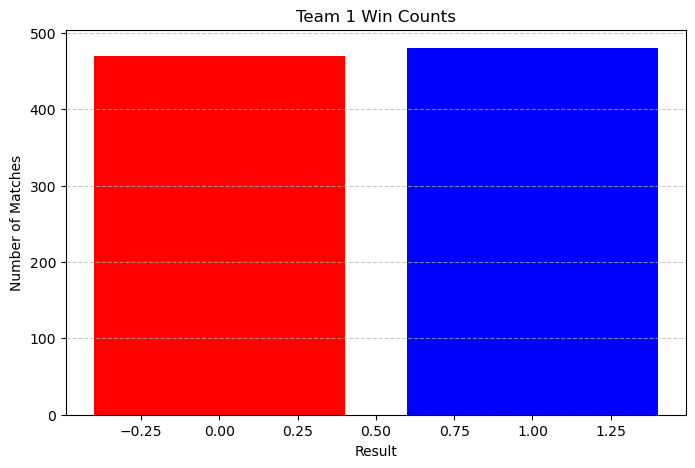

In [12]:
win_counts = final_match_df['Team1_Win'].value_counts()

plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(win_counts.index, win_counts.values, color=['blue', 'red'])  # Choose colors as per your preference

plt.title('Team 1 Win Counts')  # Title
plt.xlabel('Result')  # Label for the x-axis
plt.ylabel('Number of Matches')  # Label for the y-axis
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

#### The above classes of Team1 Winning and Losing are balanced. 

In [13]:
final_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Columns: 123 entries, Team1_Win to POM_Frequency
dtypes: float64(49), int32(74)
memory usage: 638.4 KB


### Checking correlation (to avoid multicollinearity)

Highly correlated features can lead to multicollinearity, which might distort the real effect of predictor variables on the outcome in many models:
- We calculate the correlation matrix to identify pairs of features with a correlation coefficient above 0.9.
- Features identified as highly correlated are removed to reduce multicollinearity, making sure more reliable predictions and interpretations from our models.

In [14]:
correlation_matrix = final_match_df.corr()

high_corr_list = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Threshold - 0.9
            col_name_i = correlation_matrix.columns[i]
            col_name_j = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_list.append((col_name_i, col_name_j, corr_value))

# Converting list to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_list, columns=['Variable 1', 'Variable 2', 'Correlation'])

In [15]:
high_corr_df

,Variable 1,Variable 2,Correlation
0,WonBy_Runs,WonBy_Wickets,-0.962508
1,Team1_Batting_Form_Top4,Team1_Fielding_Form_Top4,0.906585
2,Team2_Batting_Form_Top3,Team2_Batting_Form_Top4,0.903678
3,Team2_Batting_Form_Top4,Team2_Fielding_Form_Top4,0.905765


In [16]:
# Removing the highly correlated variables
del final_match_df['WonBy_Runs']
del final_match_df['Team1_Fielding_Form_Top4']
del final_match_df['Team2_Batting_Form_Top4']
del final_match_df['Team2_Fielding_Form_Top4']

In [17]:
correlation_matrix = final_match_df.corr()
high_corr_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  
            col_name_i = correlation_matrix.columns[i]
            col_name_j = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_list.append((col_name_i, col_name_j, corr_value))
high_corr_df = pd.DataFrame(high_corr_list, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation


#### Removed columns WonBy_Runs, Team1_Fielding_Form_Top4, Team2_Batting_Form_Top4 and Team2_Fielding_Form_Top4 to avoid multicollinearity. 

### Sanitizing the feature names - prerequisite for LightGBM

In [18]:
import re

def sanitize_feature_names(df):
    df.columns = [re.sub(r'\s+', '_', re.sub(r'[^\w\s]', '', col)) for col in df.columns]  # Remove special chars and replace spaces with underscores
    df.columns = [re.sub(r'^(\d+)', r'_\1', col) for col in df.columns]  # Ensure names do not start with digits
    return df

final_match_df = sanitize_feature_names(final_match_df)
final_match_df.columns = [col.strip().replace(' ', '_') for col in final_match_df.columns]
final_match_df.columns = [re.sub(r'\W', '', col) for col in final_match_df.columns]

## Reference to Benchmark Study

Before, we start the model building, we found a paper that is similar to the model we are trying to build but with different features, we've given more preference to the player performance in our models. But nevertheless, we are considering this benchmark. 
The benchmark of achieving approximately 80% accuracy in predicting the winning and losing probability of the second batting team at each point of the match is based on the findings discussed in the following study:

Nirmala, A.P., Gogoi, B., Asha, V., Naveen, A., Prasad, A., & Reddy, D.P. (2023). Analysis and Predictions of Winning Indian Premier League match using Machine Learning Algorithm. In *12th IEEE International Conference on Communication Systems and Network Technologies* (CSNT). doi:10.1109/csnt.2023.30

## Model Building:

We build several machine learning models to predict the outcomes of matches:
- Splitting the dataset into training and testing sets.
- Evaluating baseline performance of multiple models like KNN, Decision Tree, Random Forest, AdaBoost, SVM, XGBoost, and LightGBM on the training data.
- Metrics such as accuracy, precision, recall, and F1-score are calculated for both training and testing sets to judge model performance and overfitting.

In [19]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [20]:
#Features
X = final_match_df.drop('Team1_Win', axis=1)
#Target
y = final_match_df['Team1_Win']  

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()  # Start time
    
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    end_time = time.time()  # End time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Computing classification metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_precision = precision_score(y_train, train_pred, average='macro')
    test_precision = precision_score(y_test, test_pred, average='macro')
    train_recall = recall_score(y_train, train_pred, average='macro')
    test_recall = recall_score(y_test, test_pred, average='macro')
    train_f1 = f1_score(y_train, train_pred, average='macro')
    test_f1 = f1_score(y_test, test_pred, average='macro')
    
    # Returns accuracy, precision, recall, F1 for both training and testing, and time taken 
    return {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "train_precision": train_precision,
        "test_precision": test_precision,
        "train_recall": train_recall,
        "test_recall": test_recall,
        "train_f1": train_f1,
        "test_f1": test_f1,
        "elapsed_time": elapsed_time
    }

In [22]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    "LightGBM": LGBMClassifier(random_state=0)
}

results = {
    "Model": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Training Precision": [],
    "Test Precision": [],
    "Training Recall": [],
    "Test Recall": [],
    "Training F1": [],
    "Test F1": [],
    "Time Taken (seconds)": []
}

# Evaluating each model and storing results
for name, model in models.items():
    result = evaluate_model(model, X_train, X_test, y_train, y_test)

    results["Model"].append(name)
    results["Training Accuracy"].append(result["train_accuracy"])
    results["Test Accuracy"].append(result["test_accuracy"])
    results["Training Precision"].append(result["train_precision"])
    results["Test Precision"].append(result["test_precision"])
    results["Training Recall"].append(result["train_recall"])
    results["Test Recall"].append(result["test_recall"])
    results["Training F1"].append(result["train_f1"])
    results["Test F1"].append(result["test_f1"])
    results["Time Taken (seconds)"].append(result["elapsed_time"])

# Converting results to a DataFrame for display
results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 330, number of negative: 335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496241 -> initscore=-0.015038
[LightGBM] [Info] Start training from score -0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [23]:
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1,Test F1,Time Taken (seconds)
0,KNN,0.655639,0.501754,0.656398,0.501109,0.655337,0.501111,0.654937,0.501011,0.705561
1,Decision Tree,1.000000,0.642105,1.000000,0.641844,1.000000,0.642222,1.000000,0.641748,0.082386
2,Random Forest,1.000000,0.687719,1.000000,0.687629,1.000000,0.688148,1.000000,0.687473,1.039809
3,AdaBoost,0.745865,0.638596,0.746354,0.640977,0.746020,0.640741,0.745807,0.638579,0.537929
4,SVM,0.565414,0.571930,0.565444,0.572414,0.565174,0.572593,0.564847,0.571798,0.318126
5,XGBoost,1.000000,0.684211,1.000000,0.683675,1.000000,0.684074,1.000000,0.683739,0.907745
6,LightGBM,1.000000,0.708772,1.000000,0.709072,1.000000,0.709630,1.000000,0.708643,0.376294


#### Insights from above:

We tested different machine learning models on a dataset that includes player performance data up to 2022. Here’s how they did:
- **KNN** and **SVM** models didn't perform well. This suggests they might not be the best choice for handling the complex and detailed data we have.
- **Decision Tree**, **Random Forest**, and **XGBoost** models were perfect in training but didn’t do as well when tested with new data.
- **AdaBoost** had average performance and didn’t show major issues of overfitting.
- **LightGBM** was the best and reached a maximum accuracy of about 71%. 

Overall, our models worked okay but didn’t reach the high standard of 80% accuracy set by another study. This might be because our models are dealing with more complex data, focusing on recent player performances as well. 

## Model Optimization and Hyperparameter Tuning

After the initial model evaluation, we use GridSearchCV to tune the hyperparameters of our models:
- Defining a parameter grid for each model.
- Running grid search to find the best parameters that maximize the F1 score, a balanced metric considering both precision and recall.
- Evaluating the tuned models on the test set to assess improvement in performance.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Hyper-parameter grids
lgbm_params = {
    'n_estimators': range(50, 200, 25),  
    'learning_rate': [0.05, 0.1, 0.15, 0.2],  
    'max_depth': [2, 3, 4, 5],  
    'num_leaves': range(10, 50, 10)  
}

xgb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'colsample_bytree': [1],
    'subsample': [1]
}


rf_params = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 8],
    'min_samples_leaf': [None, 1]
}

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 8],
    'min_samples_leaf': [2, 3]
}

# Function for hyper-parameter tuning and evaluation
def tune_and_evaluate(model, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_test = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    
    return {
        "Best_Params": grid_search.best_params_,
        "Accuracy_Test": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_Score": f1
    }, best_model

# Tuning each model
tuned_results = []

# LightGBM
lgbm_tuned_result, lgbm_best_model = tune_and_evaluate(LGBMClassifier(random_state=0), lgbm_params, X_train, y_train, X_test, y_test)
tuned_results.append({'Model': 'LightGBM', **lgbm_tuned_result})

# XGBoost
xgb_tuned_result, xgb_best_model = tune_and_evaluate(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0), xgb_params, X_train, y_train, X_test, y_test)
tuned_results.append({'Model': 'XGBoost', **xgb_tuned_result})

# Random Forest
rf_tuned_result, rf_best_model = tune_and_evaluate(RandomForestClassifier(random_state=0), rf_params, X_train, y_train, X_test, y_test)
tuned_results.append({'Model': 'Random Forest', **rf_tuned_result})

# Decision Tree
dt_tuned_result, dt_best_model = tune_and_evaluate(DecisionTreeClassifier(random_state=0), dt_params, X_train, y_train, X_test, y_test)
tuned_results.append({'Model': 'Decision Tree', **dt_tuned_result})

# Creating and displaying the DataFrame with results
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.sort_values(by="F1_Score", ascending=False, inplace=True)
tuned_results_df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_colwidth', None)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[LightGBM] [Info] Number of positive: 330, number of negative: 335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496241 -> initscore=-0.015038
[LightGBM] [Info] Start training from score -0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [41]:
tuned_results_df

,Model,Best_Params,Accuracy_Test,Precision,Recall,F1_Score
0,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}",0.719298,0.719298,0.719298,0.719298
1,XGBoost,"{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}",0.715789,0.718955,0.715789,0.715880
2,LightGBM,"{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 150, 'num_leaves': 10}",0.705263,0.708776,0.705263,0.705314
3,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}",0.649123,0.653861,0.649123,0.648890


#### Insights after Hyperparameter tuning:

After adjusting the settings to improve our models:
- **Random Forest** saw a noticeable improvement, achieving a F1 score of 0.719298 and accuracy of 0.719298.
- **XGBoost** also performed well with an improvement of 0.715 on F1 score and accuracy. 
- **LightBGM** Scores reduced, meaning tuning didn't help and the results before are better.  
- **Decision Tree** improved the least and did not reach the desired effectiveness.

### Building the top 4 models again 

In [42]:
# Default LightGBM model
lgbm_default = LGBMClassifier()
lgbm_default.fit(X_train, y_train)
lgbm_pred = lgbm_default.predict(X_test)

# Tuned Random Forest - {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
rf_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100)
rf_tuned.fit(X_train, y_train)
rf_pred = rf_tuned.predict(X_test)

# Tuned XGBoost - {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
xgb_tuned = XGBClassifier(colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1)
xgb_tuned.fit(X_train, y_train)
xgb_pred = xgb_tuned.predict(X_test)

# Tuned Decision Tree - {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}
dt_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=8)
dt_tuned.fit(X_train, y_train)
dt_pred = dt_tuned.predict(X_test)

# Evaluating the models
results = {
    "Model": ["LightGBM", "Random Forest", "XGBoost", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, lgbm_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, dt_pred)
    ],
    "Precision": [
        precision_score(y_test, lgbm_pred, average='macro'),
        precision_score(y_test, rf_pred, average='macro'),
        precision_score(y_test, xgb_pred, average='macro'),
        precision_score(y_test, dt_pred, average='macro')
    ],
    "Recall": [
        recall_score(y_test, lgbm_pred, average='macro'),
        recall_score(y_test, rf_pred, average='macro'),
        recall_score(y_test, xgb_pred, average='macro'),
        recall_score(y_test, dt_pred, average='macro')
    ],
    "F1 Score": [
        f1_score(y_test, lgbm_pred, average='macro'),
        f1_score(y_test, rf_pred, average='macro'),
        f1_score(y_test, xgb_pred, average='macro'),
        f1_score(y_test, dt_pred, average='macro')
    ]
}

results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 330, number of negative: 335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496241 -> initscore=-0.015038
[LightGBM] [Info] Start training from score -0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [43]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.708772,0.709072,0.709630,0.708643
1,Random Forest,0.691228,0.693486,0.693333,0.691224
2,XGBoost,0.715789,0.717129,0.717407,0.715775
3,Decision Tree,0.631579,0.633333,0.633333,0.631579


### Visualizing the top 4 models by F1 Score and Accuracy

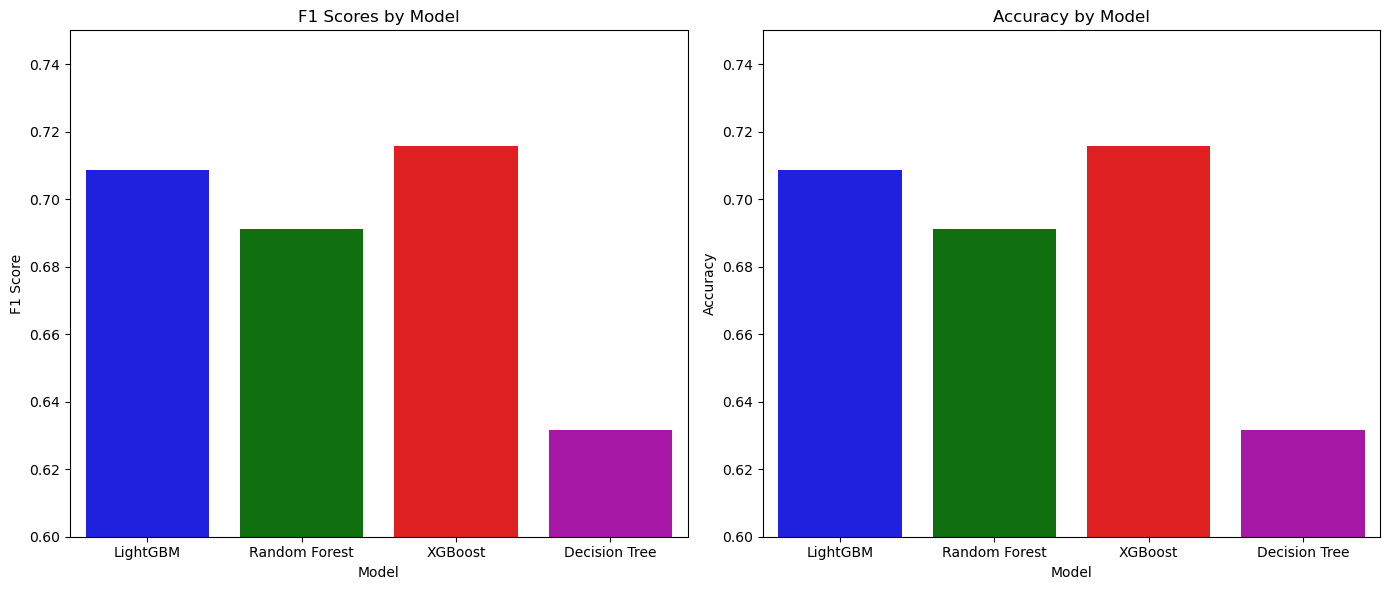

In [44]:
import seaborn as sns

# Data for visualization
models = ["LightGBM", "Random Forest", "XGBoost", "Decision Tree"]
f1_scores = [0.708643, 0.691224, 0.715775, 0.631579]  
accuracies = [0.708772, 0.691228, 0.715789, 0.631579]  

# Creating the dataframe
results_df = pd.DataFrame({
    "Model": models,
    "F1 Score": f1_scores,
    "Accuracy": accuracies
})

# Setting up the palette for uniform color across models
palette = {"LightGBM": "b", "Random Forest": "g", "XGBoost": "r", "Decision Tree": "m"}

# Creating the figure
plt.figure(figsize=(14, 6))

# Plotting F1 Scores with Seaborn
plt.subplot(1, 2, 1)
sns.barplot(x="Model", y="F1 Score", data=results_df, palette=palette)
plt.title("F1 Scores by Model")
plt.ylim(0.6, 0.75)

# Plotting Accuracies with Seaborn
plt.subplot(1, 2, 2)
sns.barplot(x="Model", y="Accuracy", data=results_df, palette=palette)
plt.title("Accuracy by Model")
plt.ylim(0.6, 0.75)

plt.tight_layout()
plt.show()

## Majority Voting Classifier

Using ensemble method like a Voting Classifier, we combine predictions from multiple models to improve accuracy:
- Configuring a soft voting classifier with our top models.
- Assessing the ensemble's performance in terms of accuracy, precision, recall, and F1 score.
- Displaying the confusion matrix to visualize the true positives and negatives versus the false ones.
- Calculating and visualize the feature importance to understand which features have the most impact on predictions.

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Models
lgbm = LGBMClassifier()
# {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100)
# {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
xgb = XGBClassifier(colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1)

# Voting classifier setup
voting_clf = VotingClassifier(
    estimators=[('lgbm', lgbm), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)

# Fit the model
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

[LightGBM] [Info] Number of positive: 330, number of negative: 335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496241 -> initscore=-0.015038
[LightGBM] [Info] Start training from score -0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [47]:
print(f"Majority Voting Classifer Results\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}")

Majority Voting Classifer Results
Accuracy: 0.7158
Precision: 0.7176
Recall: 0.7158
F1-Score: 0.7160


#### Performance of the Majority Voting Classifier

We combined the predictions from LightGBM, Random Forest, and XGBoost using a soft voting approach. This method provided an accuracy of 71.58%, which is similar to the highest accuracy we saw from individual models but still below the 80% accuracy target mentioned in the referenced study.

Although this combined approach slightly improved the overall predictions, it still did not reach the 80% accuracy goal. This suggests that we might need to further improve our models or explore different methods to better predict the outcomes based on our dataset that focuses more on player performances and other nuanced factors.

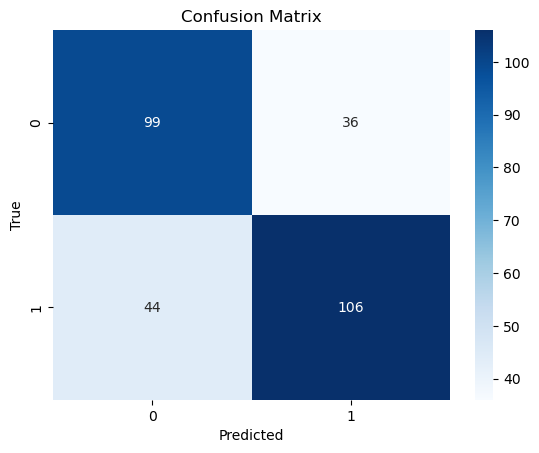

[[ 99  36]
 [ 44 106]]


In [37]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(cm)

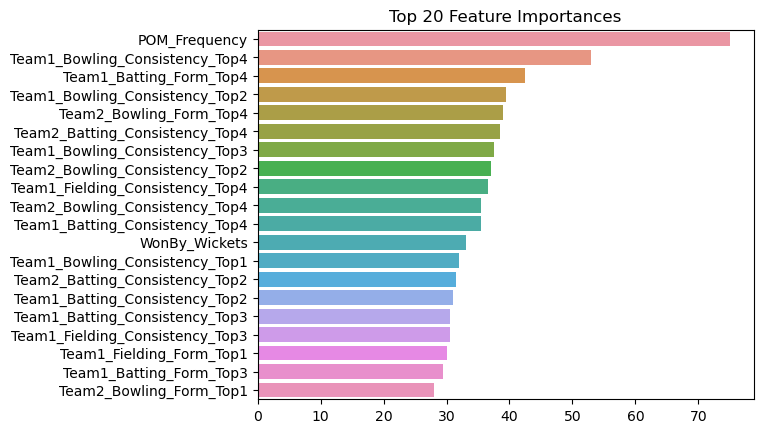

Index(['POM_Frequency', 'Team1_Bowling_Consistency_Top4',
       'Team1_Batting_Form_Top4', 'Team1_Bowling_Consistency_Top2',
       'Team2_Bowling_Form_Top4', 'Team2_Batting_Consistency_Top4',
       'Team1_Bowling_Consistency_Top3', 'Team2_Bowling_Consistency_Top2',
       'Team1_Fielding_Consistency_Top4', 'Team2_Bowling_Consistency_Top4',
       'Team1_Batting_Consistency_Top4', 'WonBy_Wickets',
       'Team1_Bowling_Consistency_Top1', 'Team2_Batting_Consistency_Top2',
       'Team1_Batting_Consistency_Top2', 'Team1_Batting_Consistency_Top3',
       'Team1_Fielding_Consistency_Top3', 'Team1_Fielding_Form_Top1',
       'Team1_Batting_Form_Top3', 'Team2_Bowling_Form_Top1'],
      dtype='object') [75.01303426 53.01161545 42.50999146 39.51147716 39.00886663 38.51223021
 37.51111297 37.00950267 36.51079312 35.51170473 35.51027655 33.0458899
 32.00826006 31.5075934  31.00899949 30.51092094 30.50931665 30.00770661
 29.51021458 28.0094488 ]


In [39]:
# Feature importance calculation (average of LGBM and RF)
fitted_lgbm = voting_clf.named_estimators_['lgbm']
fitted_rf = voting_clf.named_estimators_['rf']
average_importance = (fitted_lgbm.feature_importances_ + fitted_rf.feature_importances_) / 2

# Get feature names
features = X_train.columns

# Sort features by importance and select top 20
indices = np.argsort(average_importance)[::-1][:20]  # Sorting and slicing top 20
sorted_features = features[indices]
sorted_importances = average_importance[indices]

# Plotting top 20 feature importances
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title('Top 20 Feature Importances')
plt.show()

print(sorted_features, sorted_importances)

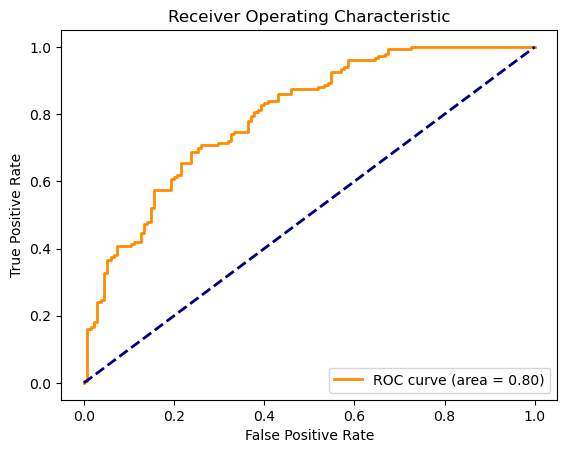

In [36]:
from sklearn.metrics import roc_curve, auc

# ROC-AUC curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Assuming positive class is at index 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

with open('majority_voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)
print("Model saved successfully!")

pkl_filename = 'Input_features.pkl'
X.to_pickle(pkl_filename)